## Importing required libraries

In [7]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


## Load the data

In [8]:
def load_csv():
    return pd.read_csv('Video_Games_Sales.csv')

## Accessing the dataframe

In [9]:
df = load_csv()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E


## Get information about the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7017 non-null   object 
 1   Platform         7017 non-null   object 
 2   Year_of_Release  6939 non-null   float64
 3   Genre            7017 non-null   object 
 4   Publisher        7013 non-null   object 
 5   NA_Sales         7017 non-null   float64
 6   EU_Sales         7017 non-null   float64
 7   JP_Sales         7017 non-null   float64
 8   Other_Sales      7017 non-null   float64
 9   Global_Sales     7017 non-null   float64
 10  Critic_Score     7017 non-null   int64  
 11  Critic_Count     7017 non-null   int64  
 12  User_Score       7017 non-null   float64
 13  User_Count       7017 non-null   int64  
 14  Developer        7013 non-null   object 
 15  Rating           6947 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 877.2+ KB


In [11]:
df["Genre"].value_counts()

Action          1677
Sports           973
Shooter          886
Role-Playing     721
Racing           598
Platform         407
Misc             396
Fighting         383
Simulation       306
Strategy         284
Adventure        265
Puzzle           121
Name: Genre, dtype: int64

In [12]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6939.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,2007.477014,0.389290,0.233095,0.062951,0.081525,0.767049,70.249822,28.783241,7.182428,173.432664
std,4.231331,0.957051,0.679210,0.284162,0.266594,1.940317,13.880646,19.167119,1.441241,581.977516
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


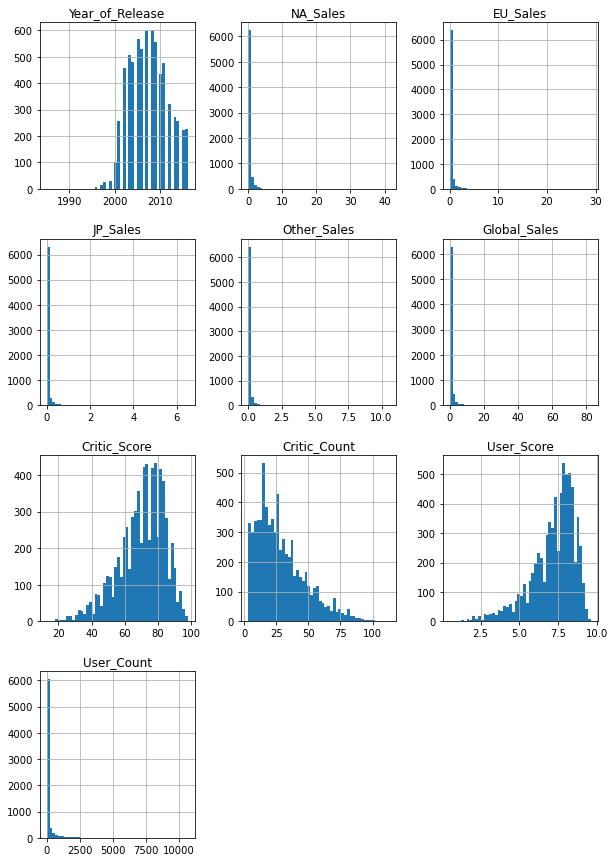

In [17]:
df.hist(bins=50, figsize=(10,15))

plt.show()

<AxesSubplot:xlabel='NA_Sales', ylabel='Genre'>

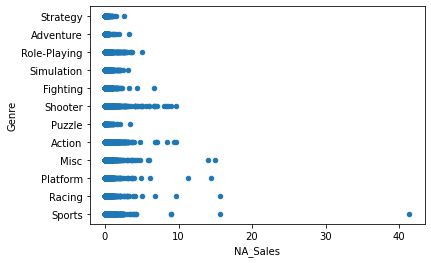

In [24]:
df.plot(kind="scatter", x="NA_Sales", y="Genre")

<AxesSubplot:xlabel='JP_Sales', ylabel='Genre'>

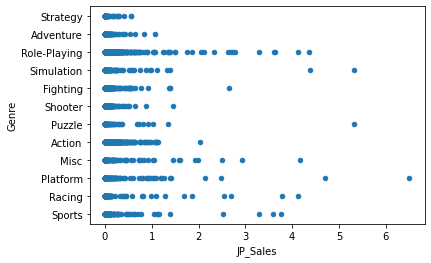

In [19]:
df.plot(kind="scatter", x="JP_Sales", y="Genre")

<AxesSubplot:xlabel='EU_Sales', ylabel='Genre'>

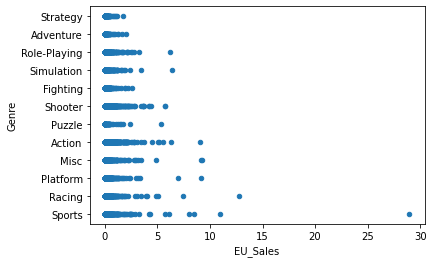

In [20]:
df.plot(kind="scatter", x="EU_Sales", y="Genre")

<AxesSubplot:xlabel='Other_Sales', ylabel='Genre'>

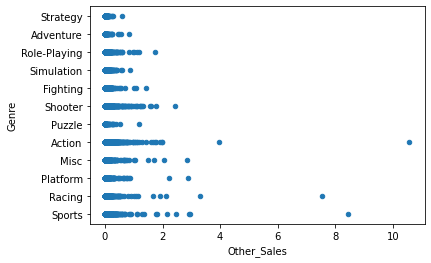

In [21]:
df.plot(kind="scatter", x="Other_Sales", y="Genre")

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

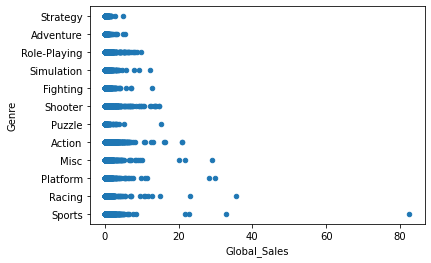

In [25]:
df.plot(kind="scatter", x="Global_Sales", y="Genre")

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

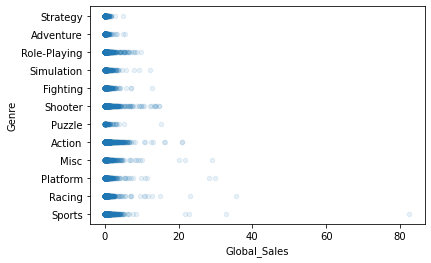

In [26]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.1)

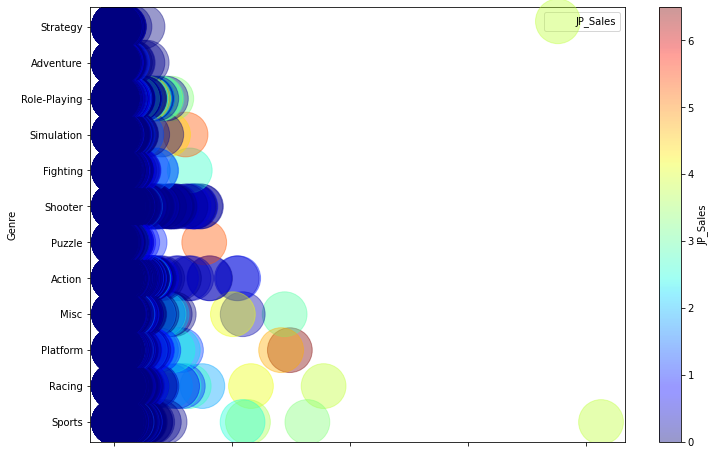

In [31]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.4,
    s=df["Year_of_Release"], label= "JP_Sales",figsize=(12,8),
    c="JP_Sales", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()